El siguiente codigo corresponde a una modelación del ASG solo para lineas (listas de unos).


Se debe ejecutar en orden para que todo funcione correctamente.

## Importación de Librerias ##





In [ ]:
# Importamos todo lo que usaremos
from scipy.stats import poisson
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import random


## Definición de funciones para la modelación##



In [ ]:
#Definimos todas las funciones que usaremos exceptuando la bifurcación.
def tamaño_sin_ceros(lista):
    # Filtramos la lista para eliminar los ceros
    lista_sin_ceros = [elemento for elemento in lista if elemento != 0]
    # Devolvemos el tamaño de la lista filtrada
    return len(lista_sin_ceros)
def lista_sin_ceros(lista):
    # Filtramos la lista para eliminar los ceros
    lista_sin_ceros = [elemento for elemento in lista if elemento != 0]
    return lista_sin_ceros
def PHI(lista):
    suma_total = 0
    n = len(lista)
    for i in range(n):
        for j in range(i + 1, n):
            suma_total += lista[i] * lista[j]
    return suma_total

#Generados de listas de tamaño n
def generador_lista(n):
    return [1] * n
#Seleccionara dos elementos aleatoriamente uno despues del otro
def SeleccionaElementos(lista):
    lista1=lista.copy()
    l1=len(lista1)
    s1=sum(lista1)
    p1=random.randint(1,s1)
    k1=1
    i1=0
    while(k1<=p1):
        k1=lista1[i1]+k1
        i1=i1+1

    lista1[i1-1]=lista1[i1-1]-1
    lista2=lista1.copy()
    l2=len(lista2)
    s2=sum(lista2)
    p2=random.randint(1,s2)
    k2=1
    i2=0
    while(k2<=p2):
        k2=lista2[i2]+k2
        i2=i2+1
    lista2[i2-1]=lista2[i2-1]-1
    return(i1-1,i2-1)
#Definimos la Coalescencia
def Coalescencia(lista):
    i,j=SeleccionaElementos(lista)
    if(i!=j):
        if(i<j):
            lista[i]=lista[i]+lista[j]-1
            lista.pop(j)
        else:
            lista[j]=lista[i]+lista[j]-1
            lista.pop(i)

    else:
        lista[i]=lista[i]-1
    return(lista)



#Definimos 2 funciones para los modelos de tiempo.
#Promedio de Tiempos para m veces el modelo
def TiempoPromedio(n,sigma,m):
    T=[]
    for i in range(1,m+1):
        T.append(ModeloTiempos(n,sigma))

    Promedio=sum(T)/len(T)

    print(Promedio)
#Promedio de Tiempos para la primera conexidad para m veces el modelo
def TiempoPromedioPrimeraConexidad(n,sigma,m):
    T=[]
    for i in range(1,m+1):
        T.append(ModeloTiemposPrimeraConex(n,sigma))

    Promedio=sum(T)/len(T)

    print(Promedio)

#Definición de Bifurcaciones #


In [ ]:
#Si se quiere cambiar la distribución de la bifurcación, se tiene que cambiar mul
def Bifurcacion(lista):
    #Actualemte es una mul=Poisson(lam)+1
    lam=6
    mul=1 +np.random.poisson(lam,1 )[0]
    l=len(lista)
    s=sum(lista)
    p=random.randint(1,s)
    k=1
    i=0
    while(k<=p):
        k=lista[i]+k
        i=i+1
    lista[i-1]=lista[i-1]+mul-1
    return(lista)




## Creación de Modelos ##
Usamos un N=30000 correspondiente al escalado a tiempo continuo

In [ ]:
#Se definen 4 modelos:
#ModeloGrafico y ModeloGraficoPrimeraConex son representaciones visuales.
#ModeloTiempos y ModeloTiemposPrimeraConex nos dara el tiempo escalado cuando termina el proceso.
def ModeloGrafico(n,sigma):
    lista=generador_lista(n)
    s=sum(lista)
    lambda1=s*(s-1)/2
    lambda2=sigma*s
    N=30000
    bp=(lambda1+lambda2)/N
    i=0
    print(lista,len(lista))
    while(tamaño_sin_ceros(lista)>1):
        if(np.random.binomial(n=1, p=bp)==1):
            if(random.uniform(0, 1)<= lambda1/(lambda1+lambda2)):
                lista=Coalescencia(lista)
            else:
                lista=Bifurcacion(lista)
            print(lista,len(lista))
            s=sum(lista)
            lambda1=s*(s-1)/2
            lambda2=sigma*s
            bp=(lambda1+lambda2)/N
        i=i+1
    return(lista)

def ModeloTiempos(n,sigma):
    lista=generador_lista(n)
    s=sum(lista)
    lambda1=s*(s-1)/2
    lambda2=sigma*s
    N=30000
    bp=(lambda1+lambda2)/N
    i=0
    while(tamaño_sin_ceros(lista)>1):
        if(np.random.binomial(n=1, p=bp)==1):
            if(random.uniform(0, 1)<= lambda1/(lambda1+lambda2)):
                lista=Coalescencia(lista)
            else:
                lista=Bifurcacion(lista)

            s=sum(lista)
            lambda1=s*(s-1)/2
            lambda2=sigma*s
            bp=(lambda1+lambda2)/N
        tiempos=(i/N)
        i=i+1
    return(tiempos)


def ModeloGraficoPrimeraConex(n,sigma):
    lista=generador_lista(n)
    s=sum(lista)
    lambda1=s*(s-1)/2
    lambda2=sigma*s
    N=30000
    bp=(lambda1+lambda2)/N
    i=0
    lista0=lista.copy()
    a=len(lista0)
    print(lista,len(lista))
    while(tamaño_sin_ceros(lista)==a):
        if(np.random.binomial(n=1, p=bp)==1):
             # cantidadde elementos antes de realizar alguna operacion
            if(random.uniform(0, 1)<= lambda1/(lambda1+lambda2)):
                lista=Coalescencia(lista)

            else:
                lista=Bifurcacion(lista)
            print(lista,len(lista))
            s=sum(lista)
            lambda1=s*(s-1)/2
            lambda2=sigma*s
            bp=(lambda1+lambda2)/N

        i=i+1
    return(lista)
def ModeloTiemposPrimeraConex(n,sigma):
    lista=generador_lista(n)
    s=sum(lista)
    lambda1=s*(s-1)/2
    lambda2=sigma*s
    N=30000
    bp=(lambda1+lambda2)/N
    i=0
    lista0=lista.copy()
    a=len(lista0)
    while(tamaño_sin_ceros(lista)==a):
        if(np.random.binomial(n=1, p=bp)==1):
            if(random.uniform(0, 1)<= lambda1/(lambda1+lambda2)):
                lista=Coalescencia(lista)
            else:
                lista=Bifurcacion(lista)

            s=sum(lista)
            lambda1=s*(s-1)/2
            lambda2=sigma*s
            bp=(lambda1+lambda2)/N
        tiempos=(i/N)
        i=i+1
    return(tiempos)





## Grafica Tiempo vs Sigma ##

In [ ]:
#Definimos 2 data frame como ejemplo de los resultados de los tiempos tras varias sigma.

# Crear un diccionario con los datos
DataPrimeraCoalescencia = {
    'Sigma': [0, 0.5, 1, 5,7, 10],
    '#X=2': [0.999, 0.567, 0.413, 0.146,0.110,0.083],
    '#X=3': [0.342, 0.246, 0.198, 0.085,0.067,0.052],
    '#X=4': [0.172, 0.130, 0.113, 0.056,0.047,0.037],
    '#X=10': [0.021, 0.022, 0.020, 0.015,0.013,0.011]
}

# Crear un diccionario con los datos
DataUltimaCoalescencia = {
    'Sigma': [0, 0.5, 1, 5,7, 10],
    '#X=2': [0.98, 0.591, 0.428,0.142,0.107,0.082],
    '#X=3': [1.325, 0.708, 0.475, 0.139,0.106,0.078],
    '#X=4': [1.488, 0.721, 0.477, 0.132,0.099,0.073],
    '#X=10': [1.783, 0.681,0.399, 0.109,0.086,0.063]
}


# Crear el DataFrame
df0 = pd.DataFrame(DataPrimeraCoalescencia)
# Crear el DataFrame
df1 = pd.DataFrame(DataUltimaCoalescencia)
# Mostrar el DataFrame

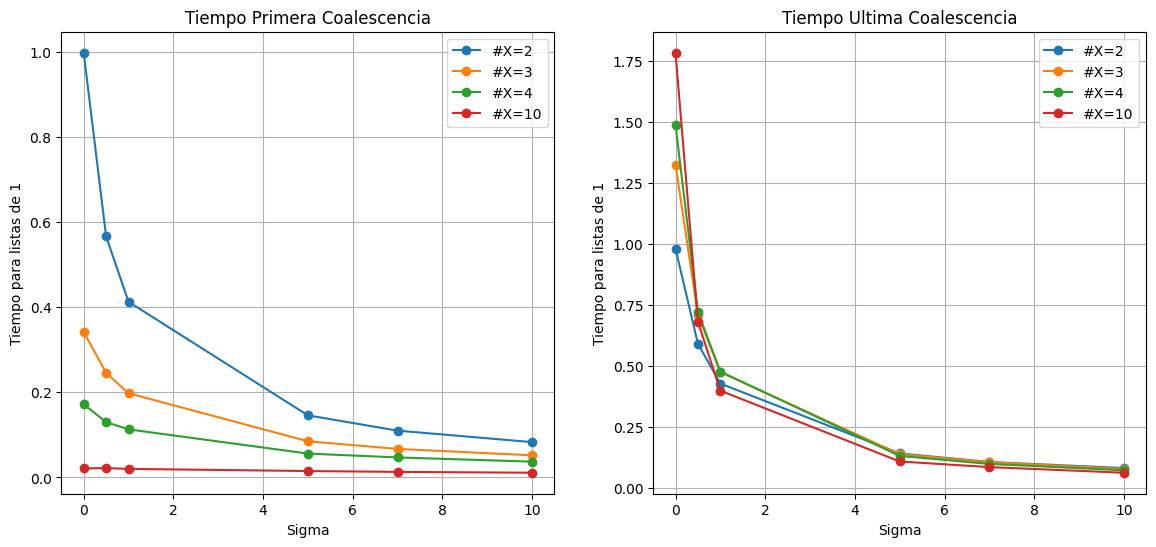

In [ ]:
#Graficos de los data frame anteriores.




columna_fija = 'Sigma'
# Definir las columnas variables que quieres graficar para el primer conjunto de datos
columnas_variables_primera = ['#X=2', '#X=3', '#X=4', '#X=10']

# Definir las columnas variables que quieres graficar para el segundo conjunto de datos
columnas_variables_ultima = ['#X=2', '#X=3', '#X=4', '#X=10']

# Graficar
plt.figure(figsize=(14, 6))

# Graficar para el primer conjunto de datos
plt.subplot(1, 2, 1)
for col in columnas_variables_primera:
    plt.plot(df0[columna_fija], df0[col], marker='o', label=col)
plt.title('Tiempo Primera Coalescencia')
plt.xlabel('Sigma')
plt.ylabel('Tiempo para listas de 1')
plt.legend()
plt.grid(True)

# Graficar para el segundo conjunto de datos
plt.subplot(1, 2, 2)
for col in columnas_variables_ultima:
    plt.plot(df1[columna_fija], df1[col], marker='o', label=col)
plt.title('Tiempo Ultima Coalescencia')
plt.xlabel('Sigma')
plt.ylabel('Tiempo para listas de 1')
plt.legend()
plt.grid(True)
plt.show()


## Uso de Modelaciones ##

Promedio de tiempo para la ultima coalescencia.

In [ ]:
# n es el tamaño de la lista de "1"
# sigma es la tasa de las bifurcaciones
# m es el numero de promedios
n=2
sigma=1
m=500
TiempoPromedio(n,sigma,m)

Promedio de tiempo para la primera coalescencia entre bloques.

In [ ]:
n=2
sigma=1
m=500
TiempoPromedioPrimeraConexidad(n,sigma,m)


Comportamiento hasta la ultima coalescencia.

In [ ]:
#Se muestra el estado y el tamaño a la derecha para ver facilmente cuando bajo un bloque
n=10
sigma=1
ModeloGrafico(n,sigma)

Comportamiento hasta la primera coalescencia entre bloques.

In [ ]:
n=10
sigma=1
ModeloGraficoPrimeraConex(n,sigma)